# Bibliotecas

In [ ]:
import math
import seaborn as sns
import datetime as dt
from datetime import datetime 

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf 

import random as rn
import numpy as np 
import pandas as pd
import os 

sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("ggplot")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 1) Extração dos dados

In [ ]:
tickers = "^BVSP"
carteira = yf.download(tickers, start="2018-01-01")

carteira.to_csv('Ibovespa.csv')

data = pd.read_csv('Ibovespa.csv')

data.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,76403.0,77909.0,76403.0,77891.0,77891.0,2880300
1,2018-01-03,77889.0,78414.0,77602.0,77995.0,77995.0,3142200
2,2018-01-04,77998.0,79135.0,77998.0,78647.0,78647.0,3486100
3,2018-01-05,78644.0,79071.0,78218.0,79071.0,79071.0,2747100
4,2018-01-08,79070.0,79395.0,78631.0,79379.0,79379.0,2550800


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1208 non-null   object 
 1   Open       1208 non-null   float64
 2   High       1208 non-null   float64
 3   Low        1208 non-null   float64
 4   Close      1208 non-null   float64
 5   Adj Close  1208 non-null   float64
 6   Volume     1208 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 66.2+ KB


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1208.000000,1208.000000,1208.000000,1208.000000,1208.000000,1.208000e+03
mean,101351.479020,102343.833441,100357.825441,101376.690255,101376.690255,7.987065e+06
std,14531.707049,14464.347295,14552.211074,14514.972706,14514.972706,4.076733e+06
min,63604.000000,67604.000000,61691.000000,63570.000000,63570.000000,0.000000e+00
25%,89792.250000,91439.500000,88585.250000,89949.750000,89949.750000,4.417300e+06
50%,102805.500000,103912.000000,101819.000000,102810.500000,102810.500000,7.876750e+06
75%,112893.500000,114104.750000,111877.750000,112898.500000,112898.500000,1.107495e+07
max,130776.000000,131190.000000,129526.000000,130776.000000,130776.000000,2.602930e+07


In [ ]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,76403.0,77909.0,76403.0,77891.0,77891.0,2880300
1,2018-01-03,77889.0,78414.0,77602.0,77995.0,77995.0,3142200
2,2018-01-04,77998.0,79135.0,77998.0,78647.0,78647.0,3486100
3,2018-01-05,78644.0,79071.0,78218.0,79071.0,79071.0,2747100
4,2018-01-08,79070.0,79395.0,78631.0,79379.0,79379.0,2550800


# 2) Processamento de Dados

            Date          Open           High            Low          Close  \
0     2018-01-02   76403.00000   77909.000000   76403.000000   77891.000000   
1     2018-01-03   77889.00000   78414.000000   77602.000000   77995.000000   
2     2018-01-04   77998.00000   79135.000000   77998.000000   78647.000000   
3     2018-01-05   78644.00000   79071.000000   78218.000000   79071.000000   
4     2018-01-08   79070.00000   79395.000000   78631.000000   79379.000000   
...          ...           ...            ...            ...            ...   
1203  2022-11-10  113579.00000  113579.000000  108516.000000  109775.000000   
1204  2022-11-11  109775.00000  113010.000000  109408.000000  111820.000000   
1205  2022-11-14  112256.00000  114322.000000  111930.000000  113161.000000   
1206  2022-11-16  113166.00000  113473.000000  109512.000000  109798.000000   
1207  2022-11-17  110240.65625  110241.796875  107245.132812  108408.828125   

          Adj Close    Volume  
0      77891.000000

,count,mean,std,min,25%,50%,75%,max
Open,1208.0,1.013515e+05,1.453171e+04,63604.0,89792.25,102805.5,112893.50,130776.0
High,1208.0,1.023438e+05,1.446435e+04,67604.0,91439.50,103912.0,114104.75,131190.0
Low,1208.0,1.003578e+05,1.455221e+04,61691.0,88585.25,101819.0,111877.75,129526.0
Close,1208.0,1.013767e+05,1.451497e+04,63570.0,89949.75,102810.5,112898.50,130776.0
Adj Close,1208.0,1.013767e+05,1.451497e+04,63570.0,89949.75,102810.5,112898.50,130776.0
Volume,1208.0,7.987065e+06,4.076733e+06,0.0,4417300.00,7876750.0,11074950.00,26029300.0


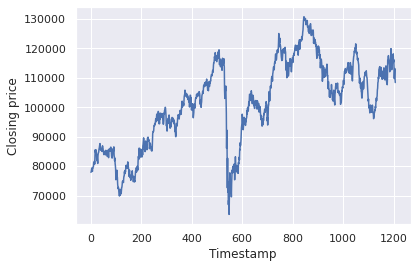

In [ ]:
sns.set()
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

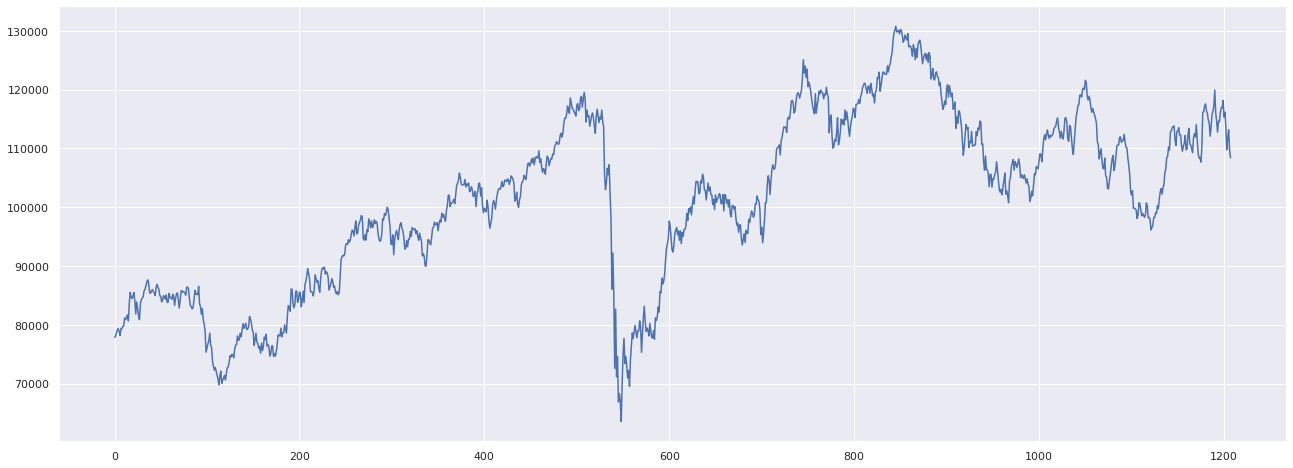

In [ ]:
# Grafico de Fechamento do Indice Ibovespa

sns.set()
df['Close'].plot(subplots=True, figsize=(22,8));

# 3) Modelos

## 3.1) Dados Para Treinamento do Modelo

In [ ]:
from sklearn.model_selection import train_test_split

x = []
y = []

size=100

for i in range(1 , len(df) - size -1 , 1):
  p = df.iloc[i,2]
  
  t1 = []
  t2 = []

  for j in range(size):
    t1.append((df.iloc[i + j, 2] - p) / p)
  t2.append((df.iloc[i + size, 2] - p) / p)
  x.append(np.array(t1).reshape(100, 1))
  y.append(np.array(t2).reshape(1, 1))

tr_x, te_x, tr_y, te_y = train_test_split(x, y, test_size=0.2, shuffle=True) # 20% foi usado para teste

train_X = np.array(tr_x)
test_X = np.array(te_x)

treino_Y = np.array(tr_y)
teste_Y = np.array(te_y)

treino_X = train_X.reshape(train_X.shape[0],1,100,1)
teste_X = test_X.reshape(test_X.shape[0],1,100,1)

print('Comprimento treino:',len(train_X))
print('Comprimento teste:',len(test_X))


Comprimento treino: 884
Comprimento teste: 222


# 3.2) Treinamento dos Modelos

In [ ]:
#Bibliotecas
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.metrics import Accuracy

## CNN

In [ ]:
# CNN

modelo1 = tf.keras.Sequential()

modelo1.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
modelo1.add(TimeDistributed(MaxPooling1D(2)))
modelo1.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
modelo1.add(TimeDistributed(MaxPooling1D(2)))
modelo1.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
modelo1.add(TimeDistributed(MaxPooling1D(2)))
modelo1.add(TimeDistributed(Flatten()))

modelo1.add(Dense(1, activation='linear'))
modelo1.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

Train_Model1 = modelo1.fit(treino_X, treino_Y, validation_data=(teste_X,teste_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)


Epoch 1/40
23/23 [==============================] - 2s 39ms/step - loss: 0.0093 - mse: 0.0093 - mae: 0.0689 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0471
Epoch 2/40
23/23 [==============================] - 1s 24ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0477 - val_loss: 0.0027 - val_mse: 0.0027 - val_mae: 0.0416
Epoch 3/40
23/23 [==============================] - 1s 26ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0424 - val_loss: 0.0020 - val_mse: 0.0020 - val_mae: 0.0355
Epoch 4/40
23/23 [==============================] - 1s 32ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0384 - val_loss: 0.0022 - val_mse: 0.0022 - val_mae: 0.0362
Epoch 5/40
23/23 [==============================] - 1s 44ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0368 - val_loss: 0.0021 - val_mse: 0.0021 - val_mae: 0.0352
Epoch 6/40
23/23 [==============================] - 1s 39ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0352 - val_loss: 0.0022 - val_mse: 0.0022 - val_mae: 0.0364
Epoch 7/40
23/23 [====

## LSTM

In [ ]:
# LSTM

modelo2 = tf.keras.Sequential()

modelo2.add(TimeDistributed(Flatten()))

modelo2.add(Bidirectional(LSTM(100, return_sequences=True)))
modelo2.add(Dropout(0.5))
modelo2.add(Bidirectional(LSTM(100, return_sequences=False)))
modelo2.add(Dropout(0.5))


modelo2.add(Dense(1, activation='linear'))
modelo2.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

Train_Model2 = modelo2.fit(treino_X, treino_Y, validation_data=(teste_X,teste_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)


Epoch 1/40
23/23 [==============================] - 13s 142ms/step - loss: 0.0067 - mse: 0.0067 - mae: 0.0600 - val_loss: 0.0014 - val_mse: 0.0014 - val_mae: 0.0300
Epoch 2/40
23/23 [==============================] - 0s 17ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0328 - val_loss: 9.0371e-04 - val_mse: 9.0371e-04 - val_mae: 0.0234
Epoch 3/40
23/23 [==============================] - 0s 17ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0278 - val_loss: 6.5155e-04 - val_mse: 6.5155e-04 - val_mae: 0.0203
Epoch 4/40
23/23 [==============================] - 0s 17ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0254 - val_loss: 8.3447e-04 - val_mse: 8.3447e-04 - val_mae: 0.0222
Epoch 5/40
23/23 [==============================] - 0s 18ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0254 - val_loss: 4.6568e-04 - val_mse: 4.6568e-04 - val_mae: 0.0166
Epoch 6/40
23/23 [==============================] - 0s 16ms/step - loss: 0.0010 - mse: 0.0010 - mae: 0.0236 - val_loss: 4.6332e-04 - val_mse: 4.6332e-0

# 3.3) Resultados: train loss; val loss; train mse; val mse; train mae; val mae

## CNN

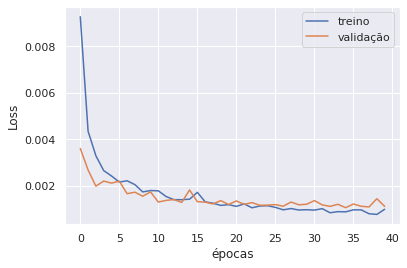

In [ ]:
# treino loss vs validacao loss
plt.plot(Train_Model1.history['loss'], label='treino')
plt.plot(Train_Model1.history['val_loss'], label='validação')
plt.xlabel("épocas")
plt.ylabel("Loss")
plt.legend()

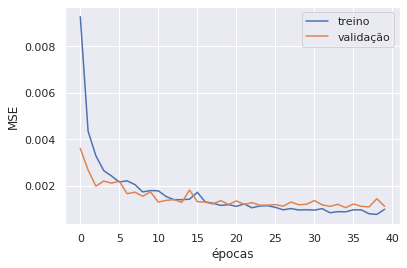

In [ ]:
# treino mse vs validação mse
plt.plot(Train_Model1.history['mse'], label='treino')
plt.plot(Train_Model1.history['val_mse'], label='validação')
plt.xlabel("épocas")
plt.ylabel("MSE")
plt.legend()

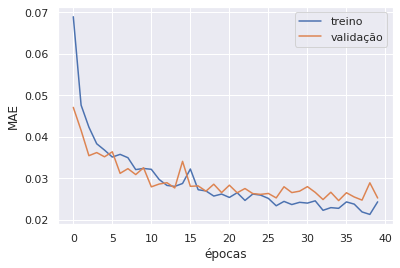

In [ ]:
#treino mae vs validação mae
plt.plot(Train_Model1.history['mae'], label='treino')
plt.plot(Train_Model1.history['val_mae'], label='validação')
plt.xlabel("épocas")
plt.ylabel("MAE")
plt.legend()

## LSTM

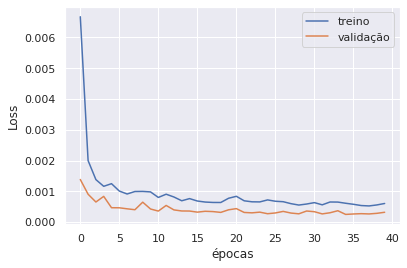

In [ ]:
# treino loss vs validação loss
plt.plot(Train_Model2.history['loss'], label='treino')
plt.plot(Train_Model2.history['val_loss'], label='validação')
plt.xlabel("épocas")
plt.ylabel("Loss")
plt.legend()

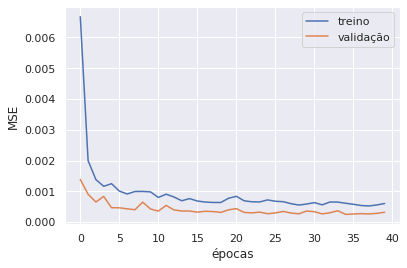

In [ ]:
# treino mse vs validação mse
plt.plot(Train_Model2.history['mse'], label='treino')
plt.plot(Train_Model2.history['val_mse'], label='validação')
plt.xlabel("épocas")
plt.ylabel("MSE")
plt.legend()

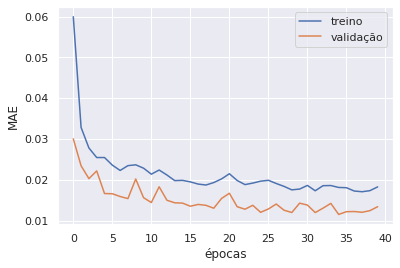

In [ ]:
#treino mae vs validação mae
plt.plot(Train_Model2.history['mae'], label='treino')
plt.plot(Train_Model2.history['val_mae'], label='validação')
plt.xlabel("épocas")
plt.ylabel("MAE")
plt.legend()

# 3.4) Sumarização dos Modelos

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_64 (TimeDi  (None, 1, 98, 64)        256       
 stributed)                                                      
                                                                 
 time_distributed_65 (TimeDi  (None, 1, 49, 64)        0         
 stributed)                                                      
                                                                 
 time_distributed_66 (TimeDi  (None, 1, 47, 128)       24704     
 stributed)                                                      
                                                                 
 time_distributed_67 (TimeDi  (None, 1, 23, 128)       0         
 stributed)                                                      
                                                                 
 time_distributed_68 (TimeDi  (None, 1, 21, 64)      

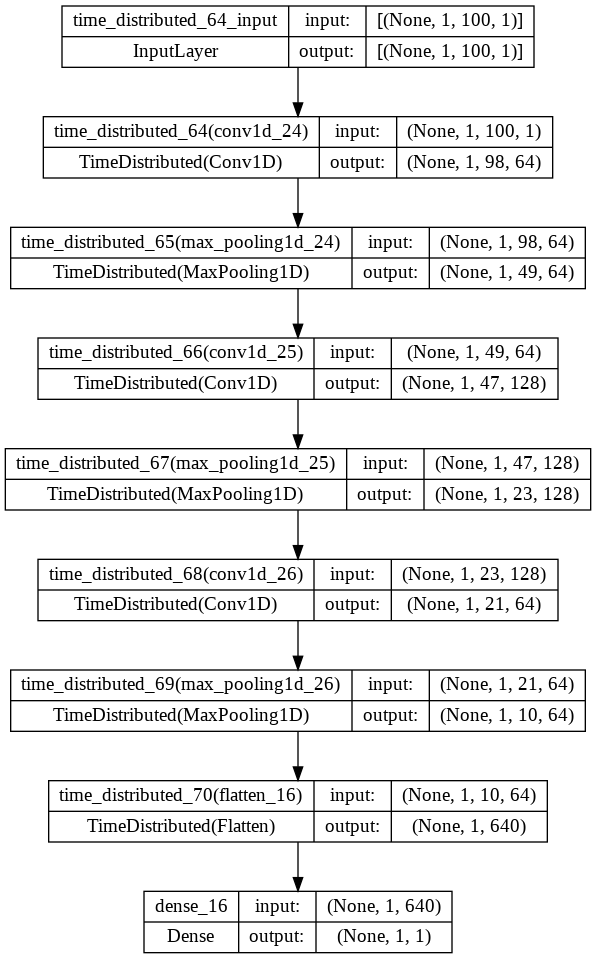

In [ ]:
# CNN
from tensorflow.keras.utils import plot_model
print(modelo1.summary())
plot_model(modelo1, to_file='modelo1.png', show_shapes=True, show_layer_names=True)


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_71 (TimeDi  (None, 1, 100)           0         
 stributed)                                                      
                                                                 
 bidirectional_16 (Bidirecti  (None, 1, 200)           160800    
 onal)                                                           
                                                                 
 dropout_16 (Dropout)        (None, 1, 200)            0         
                                                                 
 bidirectional_17 (Bidirecti  (None, 200)              240800    
 onal)                                                           
                                                                 
 dropout_17 (Dropout)        (None, 200)               0         
                                                     

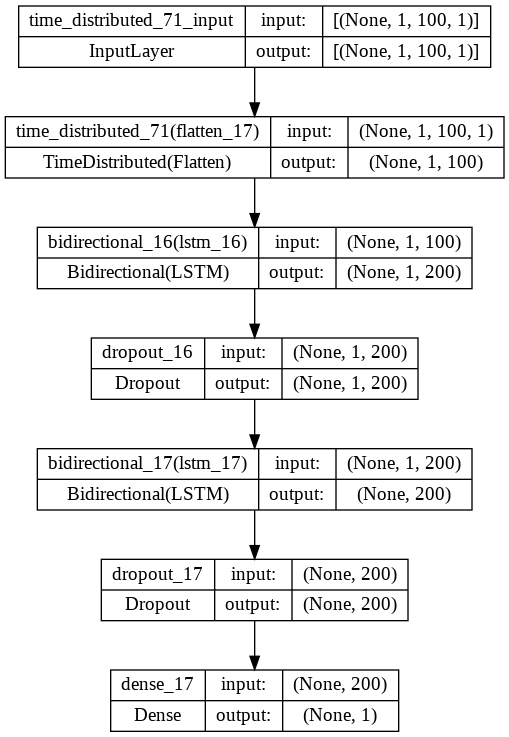

In [ ]:
#LSTM 
from tensorflow.keras.utils import plot_model
print(modelo2.summary())
plot_model(modelo2, to_file='modelo2.png', show_shapes=True, show_layer_names=True)

# 3.5) Teste do Modelo

## CNN

In [ ]:
modelo1.evaluate(teste_X, teste_Y)

7/7 [==============================] - 0s 10ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0253


[0.0011043436825275421, 0.0011043436825275421, 0.025306547060608864]

## LSTM

In [ ]:
modelo2.evaluate(teste_X, teste_Y)

7/7 [==============================] - 0s 5ms/step - loss: 3.1785e-04 - mse: 3.1785e-04 - mae: 0.0134


[0.0003178501210641116, 0.0003178501210641116, 0.013387993909418583]

# 3.6) Métricas dos Modelos

In [ ]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

## CNN

In [ ]:
Probabilidade1 = modelo1.predict(teste_X, verbose=0)
Probabilidade1 = Probabilidade1[:, 0]

R2 = r2_score(teste_Y.reshape(-1,1), Probabilidade1)
print('R2 Score: %f' % R2)

Var = explained_variance_score(teste_Y.reshape(-1,1), Probabilidade1)
print('Variancia: %f' % Var)

Var2 = max_error(teste_Y.reshape(-1,1), Probabilidade1)
print('Max Error: %f' % Var2)

R2 Score: 0.928296
Variancia: 0.932633
Max Error: 0.098290


## LSTM

In [ ]:
Probabilidade2 = modelo2.predict(teste_X, verbose=0)
Probabilidade2 = Probabilidade2[:, 0]

R2 = r2_score(teste_Y.reshape(-1,1), Probabilidade2)
print('R2 Score: %f' % R2)

Var = explained_variance_score(teste_Y.reshape(-1,1), Probabilidade2)
print('Variancia: %f' % Var)

Var2 = max_error(teste_Y.reshape(-1,1), Probabilidade2)
print('Max Error: %f' % Var2)

R2 Score: 0.979362
Variancia: 0.979363
Max Error: 0.071392


# 4) Resultados

## CNN

7/7 [==============================] - 0s 7ms/step


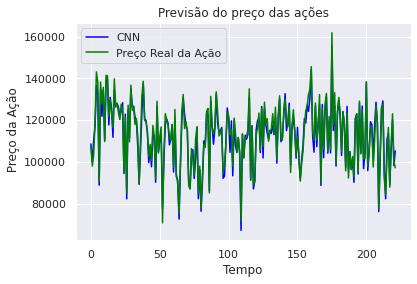

In [ ]:
xu = teste_X
yu = teste_Y

predicao1  = modelo1.predict(teste_X)
teste_label1 = teste_Y.reshape(-1,1)
predicao1 = np.array(predicao1[:,0]).reshape(-1,1)
passo1 = len(treino_X)

for j in range(passo1 , passo1 + len(teste_X)):
  tp = data.iloc[j,3]
  teste_label1[j - passo1] = teste_label1[j - passo1] * tp + tp
  predicao1[j - passo1] = predicao1[j - passo1] * tp + tp

plt.plot(predicao1, color = 'blue', label = 'CNN')
plt.plot(teste_label1, color = 'green', label = 'Preço Real da Ação')
plt.title('Previsão do preço das ações')
plt.xlabel('Tempo')
plt.ylabel(' Preço da Ação')
plt.legend()
plt.show()

## LSTM

7/7 [==============================] - 0s 6ms/step


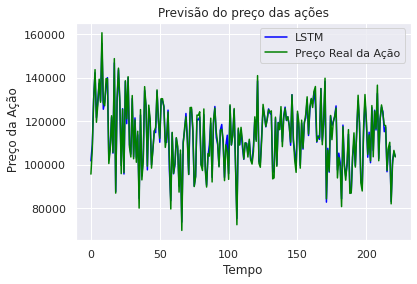

In [ ]:
predicao2  = modelo2.predict(teste_X)
teste_label2 = teste_Y.reshape(-1,1)
predicao2 = np.array(predicao2[:,0]).reshape(-1,1)
passo2 = len(treino_X)

for j in range(passo2 , passo2 + len(teste_X)):
  tp = data.iloc[j,3]
  teste_label2[j - passo2] = teste_label2[j - passo2] * tp + tp
  predicao2[j - passo2] = predicao2[j - passo2] * tp + tp

plt.plot(predicao2, color = 'blue', label = 'LSTM')
plt.plot(teste_label2, color = 'green', label = 'Preço Real da Ação')
plt.title('Previsão do preço das ações')
plt.xlabel('Tempo')
plt.ylabel(' Preço da Ação')
plt.legend()
plt.show()

            Date          Open           High            Low          Close  \
0     2018-01-02   76403.00000   77909.000000   76403.000000   77891.000000   
1     2018-01-03   77889.00000   78414.000000   77602.000000   77995.000000   
2     2018-01-04   77998.00000   79135.000000   77998.000000   78647.000000   
3     2018-01-05   78644.00000   79071.000000   78218.000000   79071.000000   
4     2018-01-08   79070.00000   79395.000000   78631.000000   79379.000000   
...          ...           ...            ...            ...            ...   
1203  2022-11-10  113579.00000  113579.000000  108516.000000  109775.000000   
1204  2022-11-11  109775.00000  113010.000000  109408.000000  111820.000000   
1205  2022-11-14  112256.00000  114322.000000  111930.000000  113161.000000   
1206  2022-11-16  113166.00000  113473.000000  109512.000000  109798.000000   
1207  2022-11-17  110240.65625  110241.796875  107245.132812  108408.828125   

          Adj Close    Volume  
0      77891.000000

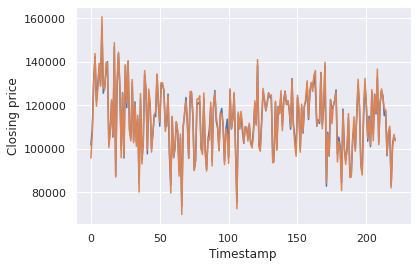

In [ ]:
sns.set()
plt.plot(predicao2, label="Close price")
plt.plot(teste_label2, label = 'Real Stock Price')
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

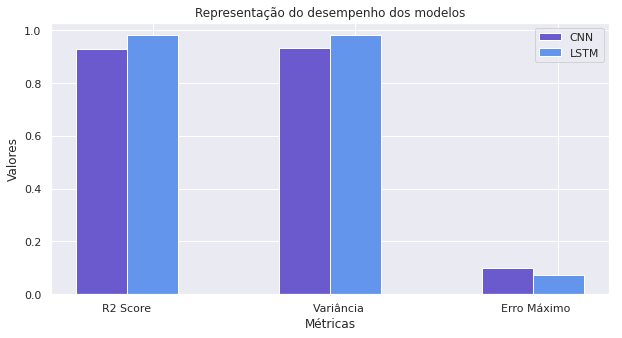

In [ ]:
CNN = [0.928296, 0.932633, 0.098290]
LSTM = [0.979362, 0.979363, 0.071392]
barWidth = 0.25
plt.figure(figsize=(10,5))
r1 = np.arange(len(CNN))
r2 = [x + barWidth for x in r1]
plt.bar(r1, CNN, color='#6A5ACD', width=barWidth, label='CNN')
plt.bar(r2, LSTM, color='#6495ED', width=barWidth, label='LSTM')
plt.xlabel('Métricas')
plt.xticks([r + barWidth for r in range(len(CNN))], ['R2 Score               ', 'Variância          ', 'Erro Máximo             '])
plt.ylabel('Valores')
plt.title('Representação do desempenho dos modelos')
plt.legend()
plt.show()